# Hypothesis testing: Blodomloppet 2011 and 2012 (Swedish running race)

Data from the race Blodomloppet 2011 and 2012 have been analysed and hypothesis tests have been performed between the years and groups. 
Three hypothesis tests are performed with T-test for the means of two independent samples between following groups:  
1.    Men 5km 2011 vs Men 5km 2012
2.    Women 5km 2011 vs Women 5km 2012
3.    Women 5km 2011 vs Men 5km 2011

The null hypothesis is that the averge time are equal and alternative hypothesis is that they are not equal.




### Table of contents:
* Exploratory Data Analysis (EDA)
* Data cleaning and manipulation
* Hypothesis 
* Conclusion

<B>NOTE</B> The formulas in jupyter notebook does not work in Github for some reason. In order to view the whole notebook properly, please paste my repo page in https://nbviewer.jupyter.org/ 


In [1]:
import pandas as pd
import scipy.stats as stats
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_women_10km_2011 = pd.read_csv('women_10km_2011.csv')
df_men_10km_2011 = pd.read_csv('men_10km_2011.csv')
df_women_5km_2011 = pd.read_csv('women_5km_2011.csv')
df_men_5km_2011 = pd.read_csv('men_5km_2011.csv')

df_women_10km_2012 = pd.read_csv('women_10km_2012.csv')
df_men_10km_2012 = pd.read_csv('men_10km_2012.csv')
df_women_5km_2012 = pd.read_csv('women_5km_2012.csv')
df_men_5km_2012 = pd.read_csv('men_5km_2012.csv')

C:\Users\orkab\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_women_10km_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pos     374 non-null    int64  
 1   Name    374 non-null    object 
 2   Born    189 non-null    float64
 3   Club    357 non-null    object 
 4   Time    374 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 14.7+ KB


In [3]:
# Check the dataframe structure 
df_women_10km_2011.tail()

,Pos,Name,Born,Club,Time
369,370,Ulla Österberg,NaN,Schneider Electric 1,1:14:49
370,371,Petra Sjöberg,NaN,Arboga Girls,1:14:58
371,372,Caroline Dieker,NaN,VAP 10,1:15:00
372,373,Maria Grankvist,NaN,Arboga Girls,1:15:08
373,374,Emma Delin,NaN,stor stark,1:22:54


In [4]:
# disable chained assignments
pd.options.mode.chained_assignment = None 

def time_format(df):
    """
    Format the time to hh:mm:ss
    If h:mm:ss then add "0" in hour position
    If mm:ss then add "00" in hour position
    
    Input: Dataframe"
    Output: Series with new time format

    """

    # Update the time format h:mm:ss to hh:mm:ss
    temp = "0"+df[df['Time'].str.len()!=5]['Time']
    df['Time'].loc[temp.index]=temp

    # Update the time format mm:ss to hh:mm:ss
    temp = "00:"+df[df['Time'].str.len()==5]['Time']
    df['Time'].loc[temp.index]=temp
    
  
    return df['Time']


df_women_10km_2011['Time'] = time_format(df_women_10km_2011)
df_women_5km_2011['Time'] = time_format(df_women_5km_2011)
df_men_10km_2011['Time'] = time_format(df_men_10km_2011)
df_men_5km_2011['Time'] = time_format(df_men_5km_2011)
df_women_10km_2012['Time'] = time_format(df_women_10km_2012)
df_women_5km_2012['Time'] = time_format(df_women_5km_2012)
df_men_10km_2012['Time'] = time_format(df_men_10km_2012)
df_men_5km_2012['Time'] = time_format(df_men_5km_2012)

In [5]:
# Check the dataframe structure again after the formating the time column
df_women_10km_2011.head()

,Pos,Name,Born,Club,Time
0,1,Johanna Eriksson,NaN,Motala AIF,00:37:57
1,2,Elin Winblad,1987.0,vintrosa,00:42:09
2,3,Jenny Brusling,NaN,Run4fun Fagersta,00:43:20
3,4,Benita Hansson,NaN,Ica maxi Örebro1,00:43:39
4,5,Matilda Andersson,1987.0,Falun,00:44:18


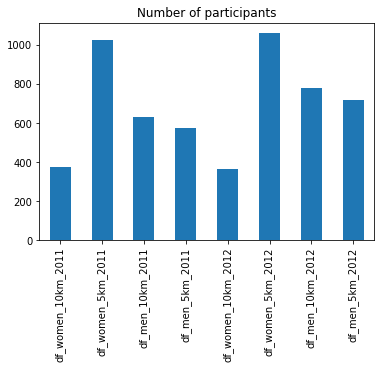

In [6]:
num_participants = pd.DataFrame({"df_women_10km_2011":[len(df_women_10km_2011)],
                                 "df_women_5km_2011":[len(df_women_5km_2011)],
                                 "df_men_10km_2011":[len(df_men_10km_2011)],
                                 "df_men_5km_2011":[len(df_men_5km_2011)],
                                 "df_women_10km_2012":[len(df_women_10km_2012)],
                                 "df_women_5km_2012":[len(df_women_5km_2012)],
                                 "df_men_10km_2012": [len(df_men_10km_2012)],
                                 "df_men_5km_2012":[len(df_men_5km_2012)]}, index=[1])

num_participants.transpose().plot(kind='bar',legend=False,title='Number of participants')
plt.show()

Data shows that number of participant differs more than 100% between 5km and 10km race for women for respectively year. For men it is around 20% difference. 5km race appears to be much more popular among women. Number of participants increased from previous year for all groups except 10km race for women. 

In [7]:
# Change values in column "Time" to timedelta

df_women_10km_2011['Time']=pd.to_timedelta(df_women_10km_2011['Time'])
df_women_5km_2011['Time']=pd.to_timedelta(df_women_5km_2011['Time'])
df_men_10km_2011['Time']=pd.to_timedelta(df_men_10km_2011['Time'])
df_men_5km_2011['Time']=pd.to_timedelta(df_men_5km_2011['Time'])
df_women_10km_2012['Time']=pd.to_timedelta(df_women_10km_2012['Time'])
df_women_5km_2012['Time']=pd.to_timedelta(df_women_5km_2012['Time'])
df_men_10km_2012['Time']=pd.to_timedelta(df_men_10km_2012['Time'])
df_men_5km_2012['Time']=pd.to_timedelta(df_men_5km_2012['Time'])

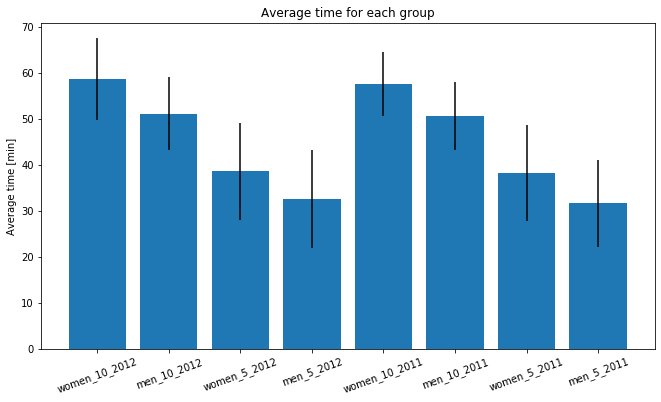

In [8]:
# Visualise the average and standard deviation for each group 

data = {'women_10_2012':(df_women_10km_2012['Time'].astype('timedelta64[s]') / 60).mean(),
        'men_10_2012':(df_men_10km_2012['Time'].astype('timedelta64[s]') / 60).mean(), 
        'women_5_2012':(df_women_5km_2012['Time'].astype('timedelta64[s]') / 60).mean(),
        'men_5_2012':(df_men_5km_2012['Time'].astype('timedelta64[s]') / 60).mean(),
        'women_10_2011':(df_women_10km_2011['Time'].astype('timedelta64[s]') / 60).mean(),
        'men_10_2011':(df_men_10km_2011['Time'].astype('timedelta64[s]') / 60).mean(),
        'women_5_2011':(df_women_5km_2011['Time'].astype('timedelta64[s]') / 60).mean(),
        'men_5_2011':(df_men_5km_2011['Time'].astype('timedelta64[s]') / 60).mean()}

std = [(df_women_10km_2012['Time'].astype('timedelta64[s]') / 60).std(),
        (df_men_10km_2012['Time'].astype('timedelta64[s]') / 60).std(),
        (df_women_5km_2012['Time'].astype('timedelta64[s]') / 60).std(),
        (df_men_5km_2012['Time'].astype('timedelta64[s]') / 60).std(),
        (df_women_10km_2011['Time'].astype('timedelta64[s]') / 60).std(),
        (df_men_10km_2011['Time'].astype('timedelta64[s]') / 60).std(),
        (df_women_5km_2011['Time'].astype('timedelta64[s]') / 60).std(),
        (df_men_5km_2011['Time'].astype('timedelta64[s]') / 60).std() ]

values = list(data.values())
groups = list(data.keys())   
plt.figure(figsize = (11, 6))
plt.bar(groups,values, yerr=std)
plt.xticks(rotation=20)
plt.ylabel('Average time [min]')
plt.title('Average time for each group')
plt.show()

The standard deviation is larger for the shorter races compared to the longer race in the bar plot for each group. This is can be explained that some participants do not really run or jogg, instead they walk more and do not care about the time.

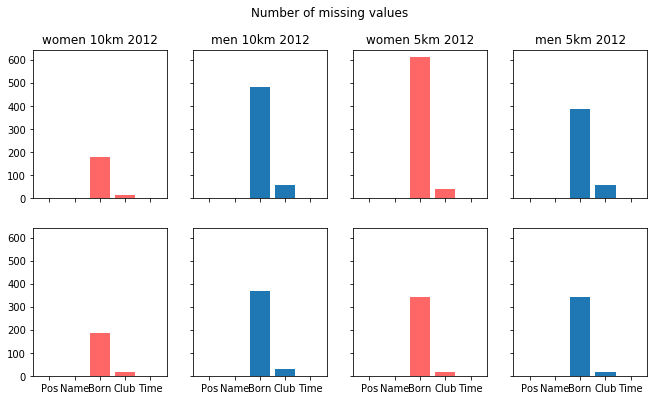

In [9]:
fig, (ax1, ax2) = plt.subplots(2,4, figsize = (11, 6), sharex = True, sharey = True)
ax1[0].bar(df_women_10km_2012.columns,df_women_10km_2012.isnull().sum(), color='red', alpha=0.6)
ax1[0].set_title('women 10km 2012')
ax1[1].bar(df_men_10km_2012.columns,df_men_10km_2012.isnull().sum())
ax1[1].set_title('men 10km 2012')
ax1[2].bar(df_women_5km_2012.columns,df_women_5km_2012.isnull().sum(), color='red', alpha=0.6)
ax1[2].set_title('women 5km 2012')
ax1[3].bar(df_men_5km_2012.columns,df_men_5km_2012.isnull().sum())
ax1[3].set_title('men 5km 2012')

ax2[0].bar(df_women_10km_2011.columns,df_women_10km_2011.isnull().sum(), color='red', alpha=0.6)

ax2[1].bar(df_men_10km_2011.columns,df_men_10km_2011.isnull().sum())

ax2[2].bar(df_women_5km_2011.columns,df_men_5km_2011.isnull().sum(), color='red', alpha=0.6)

ax2[3].bar(df_men_5km_2011.columns,df_men_5km_2011.isnull().sum())


plt.suptitle('Number of missing values')
plt.show()

In [10]:
print('---- Percentage of nulls in each group ----\n')
print('Percent of nulls for women 5km 2011: ',round(df_women_5km_2012['Born'].isnull().sum()/len(df_women_5km_2012['Born'])*100,2))
print('Percent of nulls for men 5km 2011: ',round(df_men_5km_2012['Born'].isnull().sum()/len(df_men_5km_2012['Born'])*100,2))
print('Percent of nulls for women 10km 2011: ',round(df_women_10km_2012['Born'].isnull().sum()/len(df_women_10km_2012['Born'])*100,2))
print('Percent of nulls for men 10km 2011: ',round(df_men_10km_2012['Born'].isnull().sum()/len(df_men_10km_2012['Born'])*100,2))

print('Percent of nulls for women 5km 2012: ',round(df_women_5km_2011['Born'].isnull().sum()/len(df_women_5km_2011['Born'])*100,2))
print('Percent of nulls for men 5km 2012: ',round(df_men_5km_2011['Born'].isnull().sum()/len(df_men_5km_2011['Born'])*100,2))
print('Percent of nulls for women 10km 2012: ',round(df_women_10km_2011['Born'].isnull().sum()/len(df_women_10km_2011['Born'])*100,2))
print('Percent of nulls for men 10km 2012: ',round(df_men_10km_2011['Born'].isnull().sum()/len(df_men_10km_2011['Born'])*100,2))

---- Percentage of nulls in each group ----

Percent of nulls for women 5km 2011:  57.78
Percent of nulls for men 5km 2011:  53.61
Percent of nulls for women 10km 2011:  48.63
Percent of nulls for men 10km 2011:  61.83
Percent of nulls for women 5km 2012:  56.53
Percent of nulls for men 5km 2012:  59.76
Percent of nulls for women 10km 2012:  49.47
Percent of nulls for men 10km 2012:  58.64


Unfortunatley the there are too many missing data in column "Born". Otherwise it would be interesting to see how the age influence the performance 

In [11]:
#Add new descriptive columns and then merge all the dataframes together

df_women_10km_2011['Year'] = 2011
df_men_10km_2011['Year'] = 2011
df_women_5km_2011['Year'] = 2011
df_men_5km_2011['Year'] = 2011
df_women_10km_2012['Year'] = 2012
df_men_10km_2012['Year'] = 2012
df_women_5km_2012['Year'] = 2012
df_men_5km_2012['Year'] = 2012

df_women_10km_2011['Sex'] = 'Female'
df_men_10km_2011['Sex'] = 'Male'
df_women_5km_2011['Sex'] = 'Female'
df_men_5km_2011['Sex'] = 'Male'
df_women_10km_2012['Sex'] = 'Female'
df_men_10km_2012['Sex'] = 'Male'
df_women_5km_2012['Sex'] = 'Female'
df_men_5km_2012['Sex'] = 'Male'

df_women_10km_2011['Race'] = '10km'
df_men_10km_2011['Race'] = '10km'
df_women_5km_2011['Race'] = '5km'
df_men_5km_2011['Race'] = '5km'
df_women_10km_2012['Race'] = '10km'
df_men_10km_2012['Race'] = '10km'
df_women_5km_2012['Race'] = '5km'
df_men_5km_2012['Race'] = '5km'

df = pd.concat([df_women_10km_2011,
              df_men_10km_2011,
              df_women_5km_2011,
              df_men_5km_2011,
              df_women_10km_2012,
              df_men_10km_2012,
              df_women_5km_2012,
              df_men_5km_2012])
df.head()

,Pos,Name,Born,Club,Time,Year,Sex,Race
0,1,Johanna Eriksson,NaN,Motala AIF,0 days 00:37:57,2011,Female,10km
1,2,Elin Winblad,1987.0,vintrosa,0 days 00:42:09,2011,Female,10km
2,3,Jenny Brusling,NaN,Run4fun Fagersta,0 days 00:43:20,2011,Female,10km
3,4,Benita Hansson,NaN,Ica maxi Örebro1,0 days 00:43:39,2011,Female,10km
4,5,Matilda Andersson,1987.0,Falun,0 days 00:44:18,2011,Female,10km


In [12]:
# Since there are late registered participants their name will be anonymous. We can plot for each group.
df[df['Name']=='Anonym']['Name'].count()


242

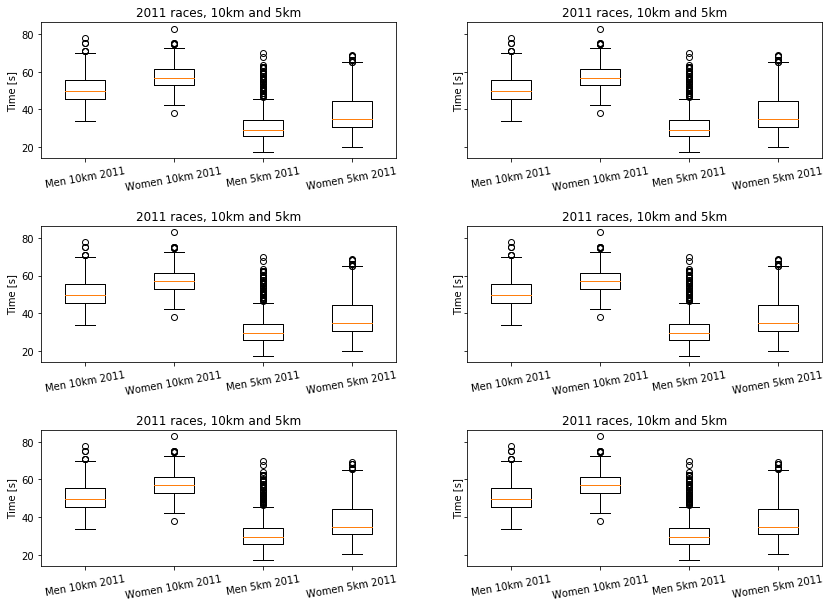

In [13]:
def box_plot(df_men_10km_2011, df_women_10km_2011, df_men_5km_2011, df_women_5km_2011):
    
    fig, axs = plt.subplots(3, 2, figsize = (14, 10), sharey=True)
    for i in range (3):
        for j in range(2):
           
            axs[i][j].boxplot([df_men_10km_2011['Time'].astype('timedelta64[s]') / 60, 
            df_women_10km_2011['Time'].astype('timedelta64[s]') / 60,
            df_men_5km_2011['Time'].astype('timedelta64[s]') / 60, 
            df_women_5km_2011['Time'].astype('timedelta64[s]') / 60], 
            labels=['Men 10km 2011','Women 10km 2011','Men 5km 2011','Women 5km 2011'])
            axs[i][j].set_title('2011 races, 10km and 5km')
            axs[i][j].set_ylabel('Time [s]')
            axs[i][j].set_xticklabels(labels=['Men 10km 2011','Women 10km 2011','Men 5km 2011','Women 5km 2011'], rotation=10)
    
    plt.subplots_adjust(hspace=0.5)
    plt.show()
    return None

box_plot(df_men_10km_2011, df_women_10km_2011, df_men_5km_2011, df_women_5km_2011)

There are some difference in the boxplots between the years and groups visually. We will do a few hypothesis testing to verify our thesis.

# Hypothesis testing 

## Scipy-package vs numerical calculation

Tests whether two independent samples means  are significantly different.

Results from Python pacakge Scipy will be compared with numerical calculation based on handbook formulas. The significant level is set to p=0.05 with 95% confidence level. We will use two approaches to check our hypothesis test, p-value and confidence interval. The results will also be presented graphically to have a visual understanding.  

Three hypothesis tests will be performed:
1.    women 5km 2011 vs Women 5km 2012
2.    Men 5km 2011 vs Men 5km 2012
3.    Women 5km 2011 vs Men 5km 2011

The null hypothesis and alternative hypothesis is following:
$$
H_0:µ_{1}= µ_{2}
$$
$$
H_A:µ_{1}\neq µ_{2}
$$

Since our samples are large we can conveniently performed as approximate Z-tests. 
To calculate the p-value, following formulas will be used:

$$
\text{Standard Error  (SE)}:\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}} 
$$
$$
\text{where } s_1^2:\text{Standard error group 1} 
\\s_2^2:\text{Standard error group 2}
\\n_1:\text{Sample size group 1}
\\n_2:\text{Sample size group 2}
$$

$$
\text{Standard score z: } \frac{\bar{X}-µ}{SE}
$$
$$
\text{where }\bar{X}: \text{The observed differences} 
\\µ:\text{The null hypothesis}
$$

The p-value will be determined from http://www.z-table.com/ with the calculated standard score z.


Confidence interval of 95% is determined by $$µ_{1}-µ_{2}\pm1.96*SE $$
The critical value 1.96 is due to the sample size is considered large. 

### Hypothesis testing: Women 5km 2011 and Women 5km 2012

In [14]:
import scipy.stats as stats
import numpy as np
import math

data1 = df_women_5km_2011['Time'].astype('timedelta64[s]') / 60
data2 = df_women_5km_2012['Time'].astype('timedelta64[s]') / 60

z_package, p = stats.ttest_ind(data1, data2,equal_var=False)

# Using handbook method
# Average for each sample
y1 = np.array(df_women_5km_2011['Time'].astype('timedelta64[s]') / 60).mean()
y2 = np.array(df_women_5km_2012['Time'].astype('timedelta64[s]') / 60).mean()

# Standard deviation for each sample
s1 = np.array(df_women_5km_2011['Time'].astype('timedelta64[s]') / 60).std(ddof=1)
s2 = np.array(df_women_5km_2012['Time'].astype('timedelta64[s]') / 60).std(ddof=1)

# Sample size for each group
n1 = len(df_women_5km_2011['Time'])
n2 = len(df_women_5km_2012['Time'])

#standard error
se = math.sqrt(s1**2/n1+s2**2/n2)

#The observed differences 
dy = y1-y2

#z-score
z_handbook = (dy-0)/se
print('Calculated z:',z_handbook)


Calculated z: -0.6417214978485959


With z = -0.642 which gives p=0.2611 from table(http://www.z-table.com/).
Since it is a two tailed test we multiply 0.2611 with 2 and get 0.521

In [15]:
p_handbook = 0.521
print('Python package')
print('stat=%.3f, p=%.3f' % (z_package, p))
print('\nNumerical calculation')
print('z=%.3f, p=%.3f' % (z_handbook, p_handbook))
if p > 0.05:
    print('Do not reject null hypothesis. \nThere is no differnce between the average time between 2011 and 2012 for women 5km race')
else:
    print('Reject null hypothesis.')


Python package
stat=-0.642, p=0.521

Numerical calculation
z=-0.642, p=0.521
Do not reject null hypothesis. 
There is no differnce between the average time between 2011 and 2012 for women 5km race


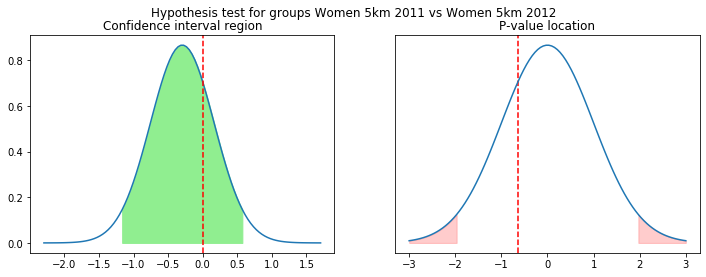

In [16]:
# Lets visualise it by plotting a normal distribution 
# with our limits

fig, axs = plt.subplots(1, 2, figsize = (12,4))

mu_ci = dy
sigma_ci = se
height_distr = stats.norm(loc=mu_ci, scale=sigma_ci)
x = np.linspace(dy-2, dy+2, 100)
y = stats.norm.pdf(x, mu_ci, sigma_ci)
cl_bottom = round(dy+1.96*se,2)
cl_top = round(dy-1.96*se,2)
top, bot = stats.norm.interval(0.95, loc=mu_ci, scale=sigma_ci)
axs[0].fill_between(x,y,where =(x>round(cl_top,3)) & (x<=round(cl_bottom,3)) ,color='lightgreen')
axs[0].plot(x, height_distr.pdf(x))
frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)
axs[0].axvline(0, alpha=1, color='red',ls='--')
axs[0].set_title('Confidence interval region')



mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
axs[1].fill_between(x,y, where =  (x <=-1.96), color ='red', alpha= 0.2)
axs[1].fill_between(x,y, where =  (x >= 1.96), color ='red', alpha= 0.2)
axs[1].axvline(-0.642, alpha=1, color='red',ls='--')
axs[1].plot(x, y)
axs[1].set_title('P-value location')
plt.suptitle('Hypothesis test for groups Women 5km 2011 vs Women 5km 2012')
plt.show()

The diffrence mean is inside the confidence intervall (green area) and this complies with standard normal curve were p-value is between the significance level (red area). The two plots complies with the numerical calculation and we fail to reject the null hopothesis, there is no difference in average time between women 5km 2011 and women 5km 2012.

### Hypothesis testing: Men 5km 2011 and Men 5km 2012

In [17]:
data1 = df_men_5km_2011['Time'].astype('timedelta64[s]') / 60
data2 = df_men_5km_2012['Time'].astype('timedelta64[s]') / 60

z_package, p = stats.ttest_ind(data1, data2,equal_var=False)

# Using handbook method
# Average for each sample
y1 = np.array(df_men_5km_2011['Time'].astype('timedelta64[s]') / 60).mean()
y2 = np.array(df_men_5km_2012['Time'].astype('timedelta64[s]') / 60).mean()

# Standard deviation for each sample
s1 = np.array(df_men_5km_2011['Time'].astype('timedelta64[s]') / 60).std(ddof=1)
s2 = np.array(df_men_5km_2012['Time'].astype('timedelta64[s]') / 60).std(ddof=1)

# Sample size for each group
n1 = len(df_men_5km_2011['Time'])
n2 = len(df_men_5km_2012['Time'])

#standard error
se = math.sqrt(s1**2/n1+s2**2/n2)

#The observed differences 
dy = y1-y2

#z-score
z_handbook = (dy-0)/se
print('Calculated z: ',z_handbook)

Calculated z:  -1.73582130466881


With z = -1.736  gives p=0.4135 from table(http://www.z-table.com/).
Since it is a two tailed test we multiply 0.4135 with 2 and get 0.827

In [18]:
p_handbook = 0.0827
print('Python package')
print('stat=%.3f, p=%.3f' % (z_package, p))
print('\nNumerical calculation')
print('z=%.3f, p=%.3f' % (z_handbook, p_handbook))
if p > 0.05:
    print('Do not reject null hypothesis. \nThere is no differnce between the average time between 2011 and 2012 for men 5km race')
else:
    print('Reject null hypothesis.')
    


Python package
stat=-1.736, p=0.083

Numerical calculation
z=-1.736, p=0.083
Do not reject null hypothesis. 
There is no differnce between the average time between 2011 and 2012 for men 5km race


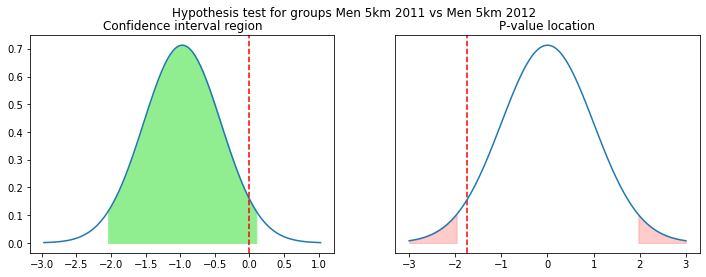

In [19]:
fig, axs = plt.subplots(1, 2, figsize = (12,4))

mu_ci = dy
sigma_ci = se
height_distr = stats.norm(loc=mu_ci, scale=sigma_ci)
x = np.linspace(dy-2, dy+2, 100)
y = stats.norm.pdf(x, mu_ci, sigma_ci)
cl_bottom = round(dy+1.96*se,2)
cl_top = round(dy-1.96*se,2)
top, bot = stats.norm.interval(0.95, loc=mu_ci, scale=sigma_ci)
axs[0].fill_between(x,y,where =(x>round(cl_top,3)) & (x<=round(cl_bottom,3)) ,color='lightgreen')
axs[0].plot(x, height_distr.pdf(x));
frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)
axs[0].axvline(0, alpha=1, color='red',ls='--')
axs[0].set_title('Confidence interval region')

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
axs[1].fill_between(x,y, where =  (x <=-1.96), color ='red', alpha= 0.2)
axs[1].fill_between(x,y, where =  (x >= 1.96), color ='red', alpha= 0.2)
axs[1].axvline(z_handbook, alpha=1, color='red',ls='--')
axs[1].set_title('P-value location')
axs[1].plot(x, y)
plt.suptitle('Hypothesis test for groups Men 5km 2011 vs Men 5km 2012')
plt.show()

The diffrence mean is inside the confidence intervall (green area) and this complies with standard normal curve were p-value is between the significance level (red area). The two plots complies with the numerical calculation and we fail to reject the null hopothesis, there is no difference in average time between men 5km 2011 and men 5km 2012.

### Hypothesis testing: Women 5km 2011 and Men 5km 2011

In [20]:
data1 = df_men_5km_2011['Time'].astype('timedelta64[s]') / 60
data2 = df_women_5km_2011['Time'].astype('timedelta64[s]') / 60

z_package, p = stats.ttest_ind(data1, data2,equal_var=False)

# Using handbook method
# Average for each sample
y1 = np.array(df_men_5km_2011['Time'].astype('timedelta64[s]') / 60).mean()
y2 = np.array(df_women_5km_2011['Time'].astype('timedelta64[s]') / 60).mean()

# Standard deviation for each sample
s1 = np.array(df_men_5km_2011['Time'].astype('timedelta64[s]') / 60).std(ddof=1)
s2 = np.array(df_women_5km_2011['Time'].astype('timedelta64[s]') / 60).std(ddof=1)

# Sample size for each group
n1 = len(df_men_5km_2011['Time'])
n2 = len(df_women_5km_2011['Time'])

#standard error
se = math.sqrt(s1**2/n1+s2**2/n2)

#The observed differences 
dy = y1-y2

#z-score
z_handbook = (dy-0)/se
print('Calculated z: ',z_handbook)

Calculated z:  -13.010058609798692


With z = -13.010  gives p=0 from table(http://www.z-table.com/).
Since it is a two tailed test we multiply 0 with 2 and get 0

In [21]:
p_handbook =0
print('Python package')
print('stat=%.3f, p=%.3f' % (z_package, p))
print('\nNumerical calculation')
print('z=%.3f, p=%.3f' % (z_handbook, p_handbook))
if p > 0.05:
    print('Do not reject null hypothesis')
else:
    print('Reject null hypothesis \nThere is a differnce between the average time between 2011 and 2012 for men 5km and women 5km race')
    

Python package
stat=-13.010, p=0.000

Numerical calculation
z=-13.010, p=0.000
Reject null hypothesis 
There is a differnce between the average time between 2011 and 2012 for men 5km and women 5km race


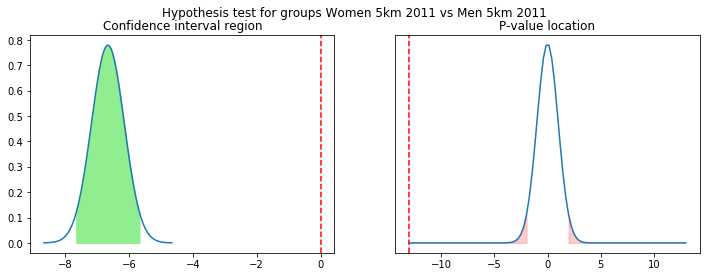

In [22]:
fig, axs = plt.subplots(1, 2, figsize = (12,4))

mu_ci = dy
sigma_ci = se
height_distr = stats.norm(loc=mu_ci, scale=sigma_ci)
x = np.linspace(dy-2, dy+2, 100)
y = stats.norm.pdf(x, mu_ci, sigma_ci)
cl_bottom = round(dy+1.96*se,2)
cl_top = round(dy-1.96*se,2)
top, bot = stats.norm.interval(0.95, loc=mu_ci, scale=sigma_ci)
axs[0].fill_between(x,y,where =(x>round(cl_top,3)) & (x<=round(cl_bottom,3)) ,color='lightgreen')
axs[0].plot(x, height_distr.pdf(x));
frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)
axs[0].axvline(0, alpha=1, color='red',ls='--')
axs[0].set_title('Confidence interval region')

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 13*sigma, mu + 13*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
axs[1].fill_between(x,y, where =  (x <=-1.96), color ='red', alpha= 0.2)
axs[1].fill_between(x,y, where =  (x >= 1.96), color ='red', alpha= 0.2)
axs[1].axvline(z_package, alpha=1, color='red',ls='--')
axs[1].plot(x, y)
axs[1].set_title('P-value location')
plt.suptitle('Hypothesis test for groups Women 5km 2011 vs Men 5km 2011')
plt.show()

The diffrence mean is outside the confidence intervall (green area) and this complies with standard normal curve were p-value is below significance level(red area). The two plots complies with the numerical calculation and we can reject the null hopothesis, there is a difference in average time between Women 5km 2011 and Men 5km 2011.

## Conclusion

Exploratory data analysis showed that number of participant differs more than 100% between 5km and 10km race for women for respectively year. For men it is around 20% difference. 5km race appears to be much more popular among women. Number of participants increased from previous year for all groups except 10km race for women. 

There are bigger variances in the shorter races (5 km) than the longer races (10 km) for both men and women and year. This can be due to many reason but one is that people may not take it so seriously, they may just want to participate and enjoyt the race.

Hypothesis tests have been performed by using python package and hand calulations respectively with 95% confidence. In addition to check the hypothesis with p-values, confidence intervalls have also been performed as an alternative way to chekc the hypothesis. 

We failed to reject the null hypothesis for following test, there is no difference in average speed between the groups:
* Men 5km 2011 vs Men 5km 2012
* Women 5km 2011 vs Women 5km 2012

and we reject the null hypothesis for following test, there is a statistical significance difference in average speed between the groups:

* Women 5km 2011 vs Men 5km 2011